# Graph TSP solution space

Plots a graph of the TSP distance for each bit string, ranked in order of distance.

In [1]:
from modules.helper_functions_tsp import (find_problem_size,
                                          cost_fn_fact, 
                                          find_distances_array,
                                          convert_integer_to_binary_list,
                                          )

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from modules.config import GRAPH_DIR

In [2]:
LOCATIONS = 10
FORMULATION = 'original'
GRAY = False
BUCKETS = 100

In [3]:
qubits = find_problem_size(LOCATIONS, FORMULATION)
print(f'There are {qubits} qubits needed for {LOCATIONS} locations in the {FORMULATION} formulation.')
distance_array, best_dist = find_distances_array(locations=LOCATIONS, 
                                                print_comments=False,
                                                )
print(f'The best distance for {LOCATIONS} locations in the {FORMULATION} formulation is {best_dist}.')

cost_fn = cost_fn_fact(LOCATIONS,
                       distance_array, 
                       gray=GRAY, 
                       method=FORMULATION,
                       )

There are 21 qubits needed for 10 locations in the original formulation.
Reading distance data
The best distance for 10 locations in the original formulation is 290.2.


In [4]:
quality_list = []
for i in range(2**qubits):
    binary_list = convert_integer_to_binary_list(i, qubits)
    cost = cost_fn(binary_list)
    cost = float(cost)
    quality = best_dist / cost * 100
    bit_string = ''.join(map(str, binary_list))
    quality_list.append(quality)

In [5]:
sorted_list = sorted(quality_list)
plot_list = []
bucket_list = []
indx = 0
step = len(sorted_list) // BUCKETS
for i in range(0, len(sorted_list), step):
    accum = 0
    for j in range(step):
        accum += sorted_list[i]
    plot_list.append(accum / step)  # Average over the bucket
    bucket_list.append(indx)
    indx += 1   

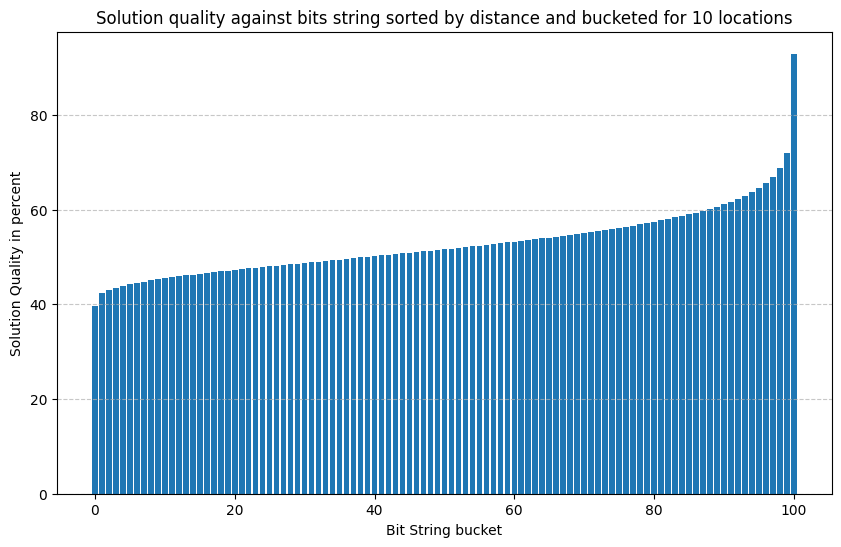

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(bucket_list, plot_list)
# Labels
plt.xlabel('Bit String bucket')
plt.ylabel('Solution Quality in percent')
plt.title(f'Solution quality against bits string sorted by distance and bucketed for {LOCATIONS} locations')
plt.grid(axis='y', linestyle='--', alpha=0.7)
filepath = Path(GRAPH_DIR).joinpath('Bit_strings_ranked_by_distance.png')
plt.savefig(filepath)
# Show plot
plt.show()